In [8]:
from FarFieldTransfer import *
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# from BeamSim import Beam_pattern

path = "/Users/zhengzhang/PythonProjects/TIBEC/REACH_Efield.txt"
antenna_sph_coords = np.loadtxt(path,
                                comments=('// >>', '73 37', '#'),
                                usecols=(0, 1),
                                max_rows=73 * 37, ).reshape(-1, 2)

antenna_sph_coords = np.deg2rad(antenna_sph_coords)

e_field = (np.loadtxt(path,
                      comments=('// >>', '73 37'),
                      usecols=(2, 4),
                      ) + 1j * np.loadtxt(path,
                                          comments=('// >>', '73 37'),
                                          usecols=(3, 5),
                                          )).reshape(26, 73, 37, 2)

In [9]:
e_field.shape

(26, 73, 37, 2)

In [10]:
alignment_x = np.array([1.0, 0, 0.])
alignment_z = np.array([0., 0., 1.])
antenna_latitude = np.pi/2
test = E_field(antenna_sph_coords, e_field, alignment_x, alignment_z, antenna_latitude)

The far-field object has been initialized!


In [11]:
def healpix_map_coordinates(nside):
    npixel = 12 * nside ** 2
    result = np.zeros(shape=(npixel, 2))
    result[:, 1], result[:, 0] = hp.pixelfunc.pix2ang(nside, np.arange(npixel))
    return result

def plot_beam(integratedBeam, saveAs=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    fig.suptitle('Antenna latitude: {} rad, LST: ({},{}) s'.format(antenna_latitude, LSTs[0], LSTs[-1]), fontsize=16)
    pols = ["T", "Q", "U", "V"]
    for P in range(4):
        plt.axes(axs.flat[P])
        hp.mollview(integratedBeam[:, P],
                    title=pols[P]+" beam pattern",
                    coord='C',
                    flip='astro',
                    rot=(0, 90, 0),
                    hold=True)
        hp.visufunc.graticule(coord='C')
    if saveAs is not None:
        fig.savefig("./{}_LST_{}_to_{}.png".format(saveAs, LSTs[0], LSTs[-1]))
    return

In [12]:
sky_sph_coords = healpix_map_coordinates(64)
LSTs = np.linspace(0.0, 86400.0, num=40, endpoint=False)
LSTs = np.linspace(0.0, 0.0, num=1)
Beam_polarized = test.generate_auto_beam_at_LSTs(LSTs, sky_sph_coords, 0)

In [13]:
aux_field = test.make_interp(sky_sph_coords.reshape((1,-1,2)), 0)
aux_beam = np.einsum("tsl, plm, tsm -> tsp",
                     np.conjugate(aux_field),
                     pauli_array,
                     aux_field)

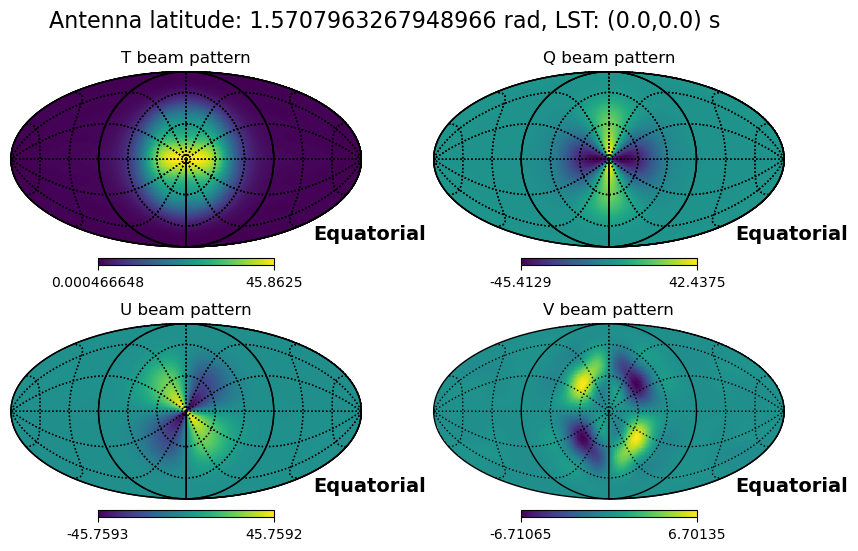

In [14]:
plot_beam(Beam_polarized[0])
# Beam_integrated.shape

In [ ]:
plot_beam(aux_beam[0])

In [ ]:
E_theta = e_field[:,:,:,0]
E_phi = e_field[:,:,:,1]

In [ ]:
np.abs(E_theta*E_phi.conj() - E_phi*E_theta.conj())

In [ ]:
np.mean(np.abs(E_theta*E_phi.conj() - E_phi*E_theta.conj()))

In [ ]:
np.mean(E_theta*E_phi.conj() - E_phi*E_theta.conj())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "/Users/zhengzhang/PythonProjects/TIBEC/REACH_Efield.txt"
antenna_sph_coords = np.loadtxt(path,
                                comments=('// >>', '73 37', '#'),
                                usecols=(0, 1),
                                max_rows=73 * 37, ).reshape(-1, 2)
theta_coords = np.unique(antenna_sph_coords[:, 1])
phi_coords = np.unique(antenna_sph_coords[:,0])

# E-field data shape: (frequency, theta, phi, 2)
e_field = (np.loadtxt(path,
                      comments=('// >>', '73 37'),
                      usecols=(2, 4),
                      ) + 1j * np.loadtxt(path,
                                          comments=('// >>', '73 37'),
                                          usecols=(3, 5),
                                          )).reshape(26, 73, 37, 2)

e_theta = e_field[:,:,:,0]
e_phi = e_field[:,:,:,1]

# Calculate the axial ratio
AR = np.sqrt((np.abs(e_theta)**2 + np.abs(e_phi)**2 + np.abs(e_theta**2 + e_phi**2))
             /(np.abs(e_theta)**2 + np.abs(e_phi)**2 - np.abs(e_theta**2 + e_phi**2)))

AR_phi = np.mean(AR, axis=2) # average over theta
AR_theta = np.mean(AR, axis=1) # average over phi

# Plots of AR for the lowest frequency

## AR(in decibels, averaged over phi) vs theta

In [ ]:
plt.plot(theta_coords, 10*np.log10(AR_theta[0]))

## AR(in decibels, averaged over theta) vs phi

In [ ]:
plt.plot(phi_coords, 10*np.log10(AR_phi[0]))

# Plots of AR for the highest frequency

## AR(in decibels, averaged over phi) vs theta

In [ ]:
plt.plot(theta_coords, 10*np.log10(AR_theta[-1]))

## AR(in decibels, averaged over theta) vs phi

In [ ]:
plt.plot(phi_coords, 10*np.log10(AR_phi[-1]))